In [ ]:
!pip install prophet

In [104]:
# Import required dependencies
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from IPython.display import clear_output
import numpy as np
import time
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns

In [ ]:
#Read in the dataset and import csv file in a DataFrame ("df")
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
    #df.head()

# create a new "cheif_term" column and add to the "df" DataFrame
chiefs = df['chief'].unique()
x = 0
for chief in chiefs:
    #print(chief)
    df.loc[df['chief'] == chief, 'chief_term'] = x
    #dfcoyp['chief_term'] = x
    x = x + 1

# print preview of "df" DataFrame
df.head()

In [ ]:
# Review data types and shape of "df"
print(f'Data Types: \n{df.dtypes}\n\n DataFrame Shape: {df.shape}')

In [107]:
#change decision date to DT for data exploration
df['dateDecision'] = pd.to_datetime(df['dateDecision'], errors='coerce')

In [108]:
#create a year column for easier sorting and aggregation in visualizations
df['yearDecision'] = df['dateDecision'].dt.year

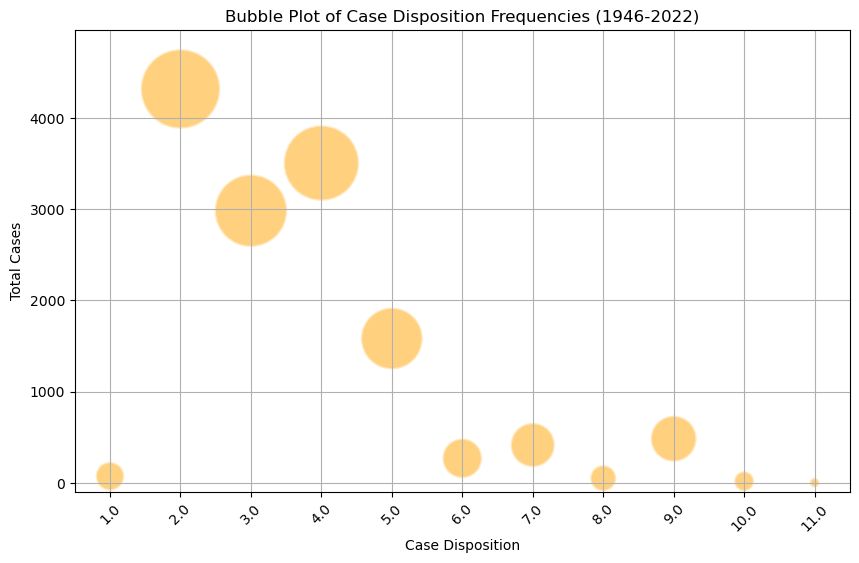

In [109]:
# Exploration Question #1: What is the most common caseDisposition? 

# Visualize the most frequest caseDisposition over total data set (not just by year) using a Bubble Plot

# Filter the DataFrame by Case Disposition and create a count column for a total count of each CD classes
case_disposition_counts = df['caseDisposition'].value_counts()
case_disposition_counts_df = pd.DataFrame(case_disposition_counts).reset_index()

# Create the bubble plot

# Create components of bubble plot (normalize bubble size for better viewing)
case_disposition_classes = case_disposition_counts_df['caseDisposition']
volume_of_cases = case_disposition_counts_df['count']
bubble_size = bubble_sizes = np.sqrt(frequencies)  * 50

plt.figure(figsize=(10, 6))
plt.scatter(
    case_disposition_classes, 
    volume_of_cases,
    s = bubble_size,  
    alpha=0.5,  
    c='orange',  
    edgecolors='w',  
    linewidth=2  
)
# Set the title and labels
plt.title('Bubble Plot of Case Disposition Frequencies (1946-2022)')
plt.xlabel('Case Disposition')
plt.ylabel('Total Cases')

#Fix x-axis display and use caseDisposition values as tick positions
x_ticks = case_disposition_classes
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=45)  # Rotate labels if needed for readability

#Fix y-axis dispaly to view whole bubble (set a little below zero and 15% above maximum)
plt.ylim(-100, max(frequencies) * 1.15)  

#save the plot to outputs folder

plt.savefig('outputs/case_disposition_bubble_plot.png')
# Show the plot
plt.grid(True)
plt.show()

In [110]:
# Exploration Question #2: Have case dispositions changed over time?

# Determine the most frequent Case Disposition Classification by Year
# Filter the DataFrame by Year and Case Disposition and create a mode column for most frequent classification of CD
# Apply function to account for multiple modes (select first) and no mode (fill with NaN)
case_disposition_mode = df.groupby('yearDecision')['caseDisposition'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
case_disposition_mode_df = pd.DataFrame(case_disposition_mode)
# reset the index and preview
case_disposition_mode_df = case_disposition_mode_df.reset_index()
case_disposition_mode_df.head()

,yearDecision,caseDisposition
0,1946,2.0
1,1947,2.0
2,1948,2.0
3,1949,2.0
4,1950,2.0


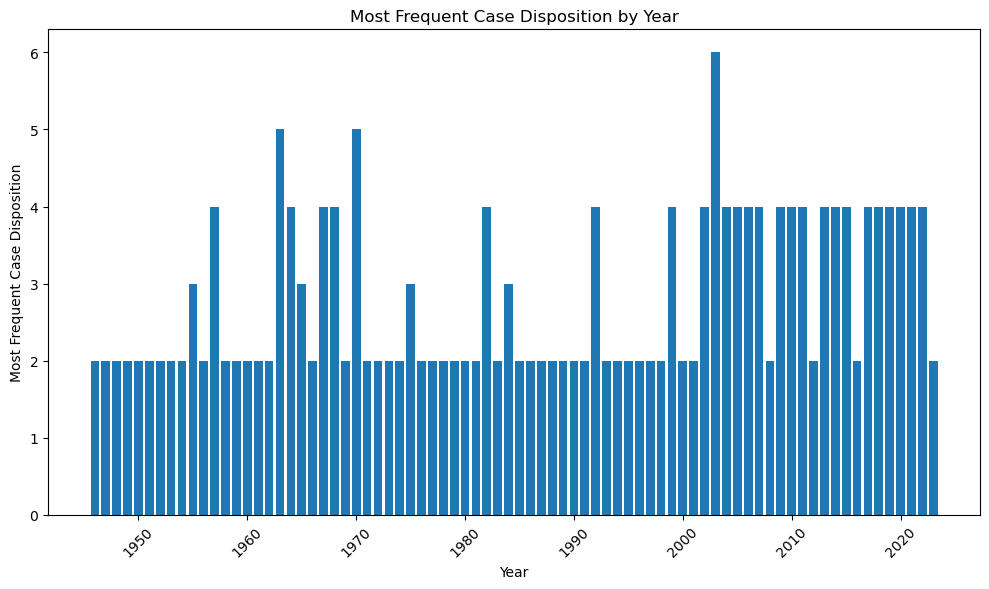

In [111]:
# visualize the mode by year with a bar graph and save image to outputs file
plt.figure(figsize=(10, 6)) 
plt.bar(case_disposition_mode_df['yearDecision'], case_disposition_mode_df['caseDisposition'])
# add labels
plt.xlabel('Year')  
plt.ylabel('Most Frequent Case Disposition') 
plt.title('Most Frequent Case Disposition by Year') 
# format to improve readability of x-axis and graph

plt.xticks(rotation=45)  
plt.tight_layout()  

plt.savefig('outputs/case_disposition_by_year.png')
plt.show()

In [138]:
# Exploration Question #3: How have case dispositions changed over time, based on who is serving as Chief Justice?
# Filter the DataFrame by Term of Chief Justice and Case Disposition
chief_counts = df.groupby(['chief'])['caseDisposition'].value_counts()
chief_counts_df = pd.DataFrame(chief_counts)
chief_counts_df.head()

count
chief  caseDisposition       
Burger 2.0               1257
       3.0               1048
       4.0               1005
       5.0                506
       7.0                134

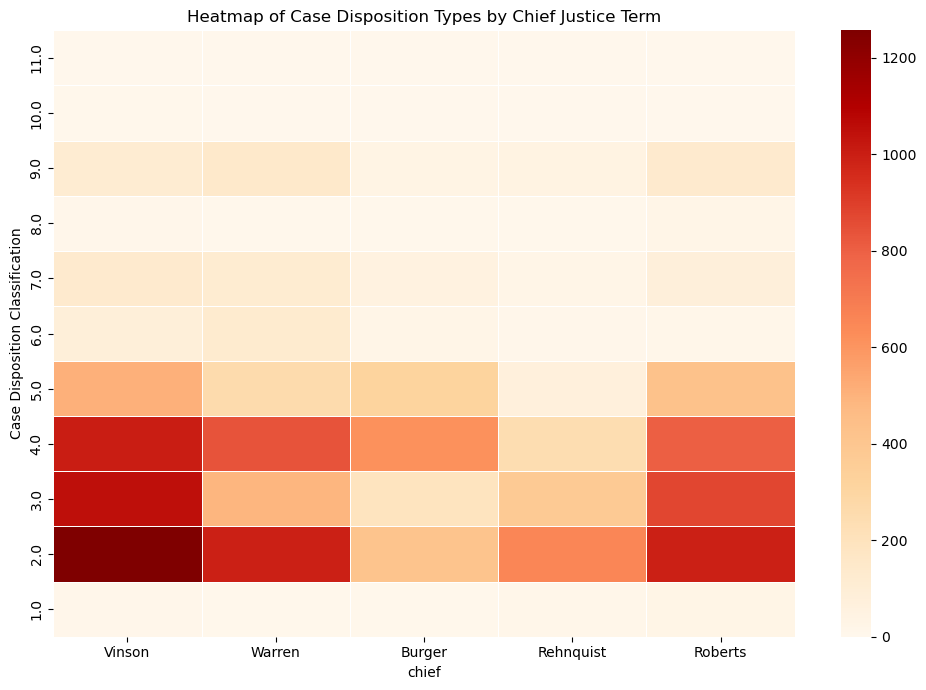

In [139]:
# Create a pivot table for plotting
pivot_df2 = chief_counts_df.pivot_table(index='caseDisposition', columns=['chief'], values='count', fill_value=0)

# Fix index for display purposes
pivot_df2 = pivot_df2.sort_index(ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 7))
ax1 = sns.heatmap(pivot_df2, annot=False, cmap='OrRd', cbar=True, linewidths=.5)

# Add labels and format
plt.title('Heatmap of Case Disposition Types by Chief Justice Term')
ax1.set_xticklabels(['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts'] * (pivot_dd.shape[1] // 5))
plt.ylabel('Case Disposition Classification')
plt.tight_layout()  
# Save the plot
plt.savefig('outputs/heatmap_cd_cjterm.png')
# Show the heatmap plot
plt.show()

In [142]:
#Exploration Question #4: Can we categorize the overall tone of case decisions based on the term of the chief justice?
# Filter the DataFrame by Term of Chief Justice and Decision Direction and add a count column for DD classes
chief_counts_dd = df.groupby(['chief_term', 'chief'])['decisionDirection'].value_counts()
chief_counts_dd_df = pd.DataFrame(chief_counts_dd)
chief_counts_dd_df.head()

count
chief_term chief  decisionDirection       
0.0        Vinson 1.0                  732
                  2.0                  669
                  3.0                   22
1.0        Warren 2.0                 2194
                  1.0                 1182

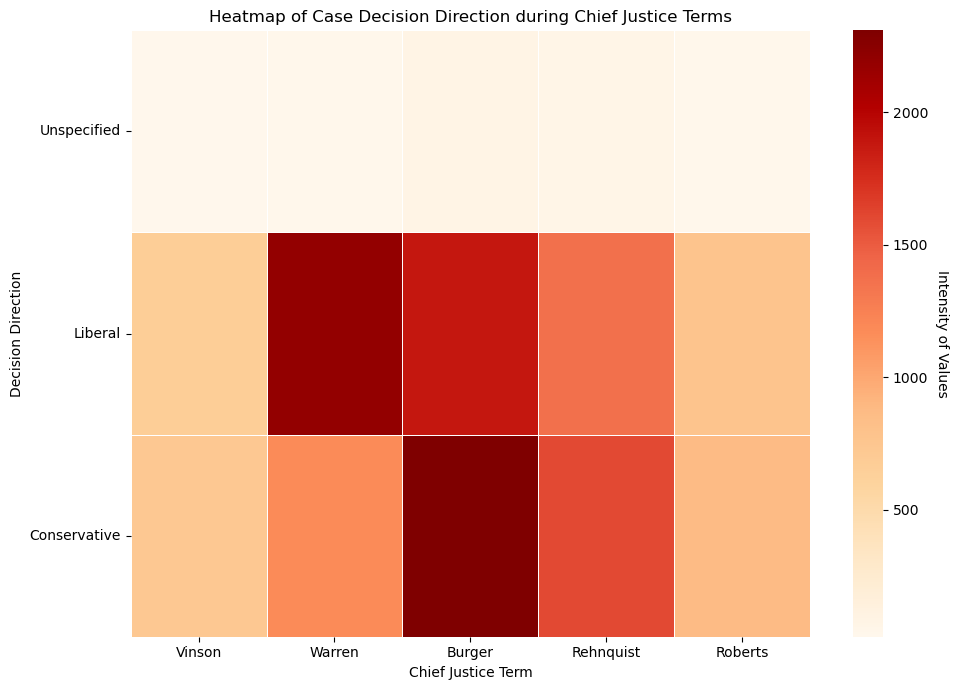

In [173]:
# Pivot the DataFrame to get counts for each direction per term
pivot_dd_index = chief_counts_dd_df.pivot_table(index='decisionDirection', columns='chief_term', values='count', fill_value=0)
pivot_dd = pivot_dd_index.sort_index(ascending=False)

# Plot the heatmap and save as a variable for customization
plt.figure(figsize=(10, 7))
ax = sns.heatmap(pivot_dd, cmap="OrRd", cbar=True, linewidths=.5)

# Center x-tick and y-tick in middle (rather than at classification's numerical position)
ax.set_xticks(np.arange(pivot_dd.shape[1]) + 0.5)
ax.set_yticks(np.arange(pivot_dd.shape[0]) + 0.5)

# Change x-tick and y-tick labels from numerical classification to corresponding text value and format 
ax.set_xticklabels(['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts'] * (pivot_dd.shape[1] // 5))
ax.set_yticklabels(["Unspecified", "Liberal", "Conservative"], rotation=0)

# Customize the color bar (legend)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Intensity of Values', rotation=270, labelpad=15)

# Customize the plot
plt.title('Heatmap of Case Decision Direction during Chief Justice Terms')
plt.xlabel('Chief Justice Term')
plt.ylabel('Decision Direction')
plt.tight_layout()  # Adjust layout to fit labels
#save the plot
plt.savefig('outputs/heatmap_dd_cjterm.png')
# Show the plot
plt.show()

In [144]:
#Exploration Question #5: Can we predict the overall tone of future decisions?
#creating dataframe for using in projection modeling
dd_by_date_df = pd.DataFrame(df[['dateDecision','decisionDirection']])
dd_by_date_df.tail()

,dateDecision,decisionDirection
13849,2023-06-22,2.0
13850,2023-06-22,2.0
13851,2023-05-25,1.0
13852,2023-05-22,1.0
13853,2023-06-23,1.0


In [145]:
#change columns names for dd Dataframe for projections
dd_by_date_df.columns = ["ds", "y"]
dd_by_date_df.tail()

,ds,y
13849,2023-06-22,2.0
13850,2023-06-22,2.0
13851,2023-05-25,1.0
13852,2023-05-22,1.0
13853,2023-06-23,1.0


13:43:32 - cmdstanpy - INFO - Chain [1] start processing
13:43:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(

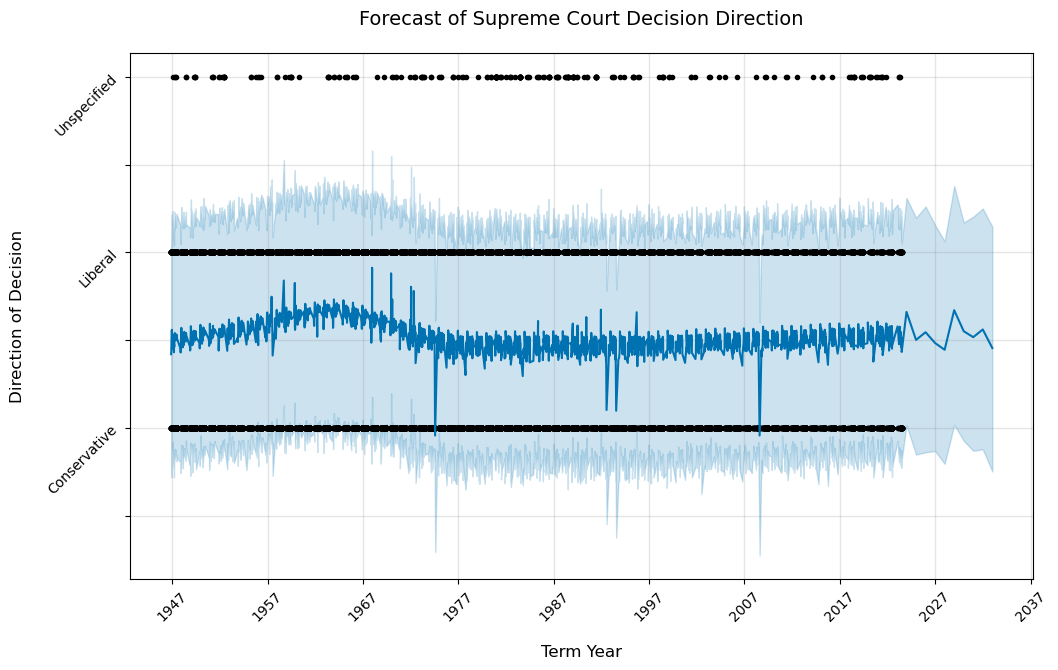

In [146]:
#creating variables forecasting period and frequency (years)
forecasting_period = 10
forecasting_frequency = 'Y'

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(dd_by_date_df)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# FORMAT AXES

# Access the axes
ax = fig.gca()

# Label x-axis, y-axis, and titles
ax.set_xlabel('Term Year', fontsize=12, labelpad=15)  
ax.set_ylabel('Direction of Decision', fontsize=12, labelpad=15)
ax.set_title('Forecast of Supreme Court Decision Direction', fontsize=14, pad=20)  # Set plot title

# Label x-ticks and y-ticks
ax.tick_params(axis='x', rotation=45)  

ax.tick_params(axis='y', labelsize=10) 
new_labels = [' ', ' ', 'Conservative', '', 'Liberal', '', 'Unspecified']
ax.set_yticklabels(new_labels, rotation=45, fontsize=10)

# save the plot
plt.savefig('outputs/forecast_dd.png')

# Show the plot
plt.show()

c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\dipes\anaconda_3\envs\dev1\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

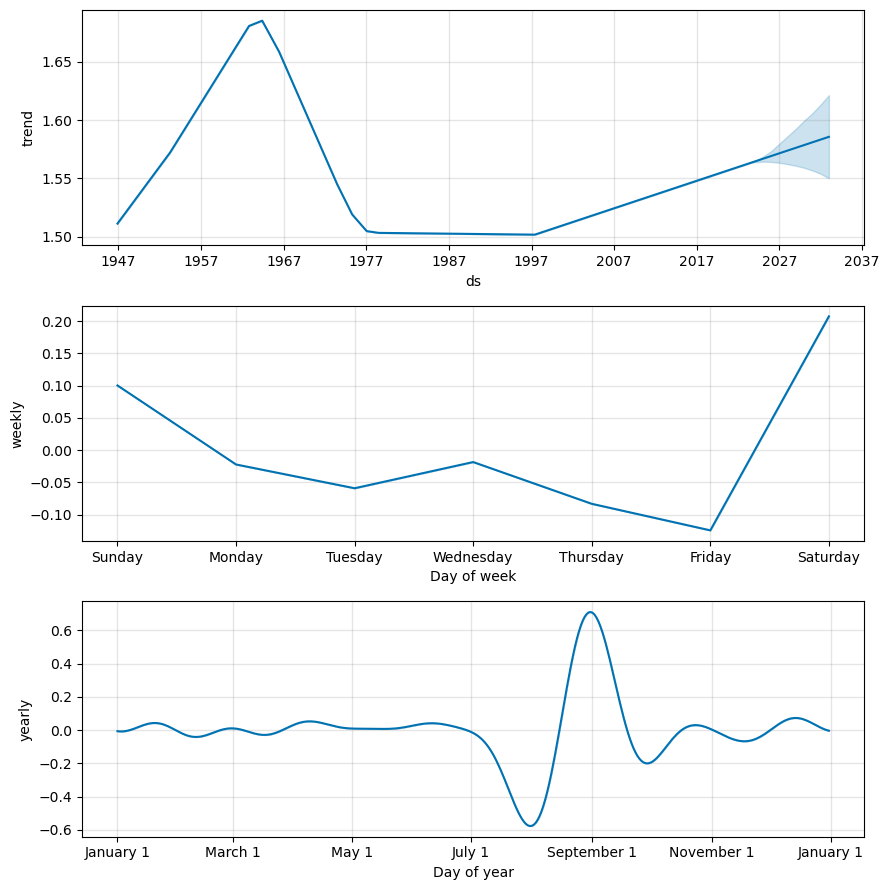

In [147]:
# plot the components
fig = model.plot_components(forecast)
# save the component plot
plt.savefig('outputs/forecast_dd_components.png')
# Show the plot
plt.show()

In [148]:
#Create a new working DataFrame from original "df" called "dfwork" with reduced columns
dfwork = df[[
#"issueArea",
"decisionDirection",
"decisionType",
"threeJudgeFdc",
"certReason",
#"lcDisposition",
"lcDispositionDirection",
"partyWinning",
"majVotes",
#"chief_term",
"minVotes",
"caseDisposition"
]]

In [149]:
# Create a correlation table to view relationship between variables
corr_df = dfwork.corr()
# save correlation csv to outputs file
corr_df.to_csv('outputs/correlation.csv', index=False)
corr_df

,decisionDirection,decisionType,threeJudgeFdc,certReason,lcDispositionDirection,partyWinning,majVotes,minVotes,caseDisposition
decisionDirection,1.000000,-0.011150,0.005293,-0.040393,-0.108235,0.094781,0.107861,-0.121406,-0.026995
decisionType,-0.011150,1.000000,0.016891,0.060066,-0.055781,-0.067473,-0.059417,0.048407,0.176855
threeJudgeFdc,0.005293,0.016891,1.000000,-0.396706,0.110311,-0.015379,-0.026838,0.029615,0.010898
certReason,-0.040393,0.060066,-0.396706,1.000000,-0.091611,0.098374,-0.033025,0.022940,0.055383
lcDispositionDirection,-0.108235,-0.055781,0.110311,-0.091611,1.000000,0.008648,-0.037116,0.052694,-0.034858
partyWinning,0.094781,-0.067473,-0.015379,0.098374,0.008648,1.000000,0.094350,-0.093165,0.296629
majVotes,0.107861,-0.059417,-0.026838,-0.033025,-0.037116,0.094350,1.000000,-0.931409,0.108946
minVotes,-0.121406,0.048407,0.029615,0.022940,0.052694,-0.093165,-0.931409,1.000000,-0.109767
caseDisposition,-0.026995,0.176855,0.010898,0.055383,-0.034858,0.296629,0.108946,-0.109767,1.000000


In [180]:
trained_model = None
prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
prompts = prompts.sort_values(by = ['features', 'selection'])
prompts.reset_index(drop=True, inplace=True)

In [158]:
#model_score = []
#model_scores = pd.DataFrame()


def run_model(target):
    dfwork = df[[
    #"issueArea",
    "decisionDirection",
    "decisionType",
    "threeJudgeFdc",
    "certReason",
    #"lcDisposition",
    "lcDispositionDirection",
    "partyWinning",
    "majVotes",
    #"chief_term",
    "minVotes",
    "caseDisposition"
    ]]

    y=df[[target]]
    X = dfwork.drop(columns=y)
    dfwork= dfwork.sort_index(axis=1)
    columns_to_move = ['majVotes', 'minVotes']
    remaining_columns = [col for col in dfwork.columns if col not in columns_to_move]
    dfwork = dfwork[remaining_columns + columns_to_move]

    #reading csv file from link

    #from sklearn.impute import SimpleImputer

    # Impute missing values with the mean
    imputery = SimpleImputer(strategy='constant', fill_value=0)
    #caseDisposition = df[['caseDisposition']]
    y_imputed = imputery.fit_transform(y).reshape(-1)
    #y_imputed = y_imputed.reshape(-1)
    #print(y_imputed)

    #from sklearn.impute import SimpleImputer

    # Impute missing values with the mean
    imputerx = SimpleImputer(strategy='most_frequent')
    X_imputed = pd.DataFrame(imputerx.fit_transform(X), columns=X.columns)
    #print(X_imputed)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, random_state=42)

    return X_train, X_test, y_train, y_test, target

def models(X_train, X_test, y_train, y_test, target):
    knn(X_train, X_test, y_train, y_test, target)
    lr(X_train, X_test, y_train, y_test, target)
    rf(X_train, X_test, y_train, y_test, target)
    dt(X_train, X_test, y_train, y_test, target)
    #return X_train, X_test, y_train, y_test, target
    #return rt_model

#    return X_train, X_test, y_train, y_test, target
    
    # Create the KNN model with 9 neighbors


def knn(X, xt,y, yt, target):
    model = KNeighborsClassifier(n_neighbors=10)
    model_name = 'KNN'
    function_name = 'knn'
    # Fit the model to the training data
    model.fit(X, y)

    #using score function to find training and testing score
    train_score = model.score(X, y)
    test_score = model.score(xt, yt)
    predictions = model.predict(xt)
    acc_score = accuracy_score(yt, predictions)
    #display(f"{model_name} Train/Test Score for {target} column : {train_score:.3f}/{test_score:.3f}")
    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    #return knn_train_score, knn_test_score, target
    return model

def lr(X, xt,y, yt, target):
    # Create the logistic regression classifier model with a random_state of 1
    model = LogisticRegression(max_iter=2000)
    model_name = 'Logistic Regression'
    function_name = 'lr'
    # Fit the model to the training data
    model.fit(X, y)

    train_score = model.score(X, y)
    test_score = model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")

    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return model

def rf(X, xt,y, yt, target):
    # Create the logistic regression classifier model with a random_state of 1
    rt_model = RandomForestClassifier(n_estimators=128, random_state=42)
    model_name = 'Random Forest'
    function_name = 'rf'
    # Fit the model to the training data
    rt_model.fit(X, y)
    
    train_score = rt_model.score(X, y)
    test_score = rt_model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = rt_model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")
    #trained_model = model
    #print({trained_model})
    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return rt_model

def dt(X, xt,y, yt, target):
    from sklearn import tree
    # Create the logistic regression classifier model with a random_state of 1
    model = tree.DecisionTreeClassifier()
    model_name = 'Decision Tree'
    function_name = 'dt'
    # Fit the model to the training data
    model.fit(X, y)

    train_score = model.score(X, y)
    test_score = model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")

    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return model

def update_score(target, model, fn, trs, tss, acc):
    
    model_score.append({'target_column': target, 'model_name': model, 'function_name' : fn, 'training_score': trs, 'testing_score': tss, 'accuracy_score': acc})
    #display(model_scores.head())
    #return model_scores    

def predict_outcome(trained_model):
    #    #prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
#    prompts = prompts.sort_values(by = ['features', 'selection'])
#    prompts.reset_index(drop=True, inplace=True)
#    prompts
    #selection_prompts = prompts
    selection1 = np.array([])
    for p in prompts['features'].unique():
        #time.sleep(1)
        display(f"Please select a feature from the list of {p} below:")
        
        for i, feature in enumerate((prompts[prompts['features'] == p]['value']), start=1):
            display(f"{i}... {feature}")
        selection1 = np.append(selection1,int(input("Enter the number corresponding to your choice: "))).astype(int)
        
        clear_output()
        
        #time.sleep(1)

    mv = np.append(selection1,int(input("Enter number of majority votes: "))).astype(int)
    nv = np.append(selection1,int(input("Enter number of minority votes: "))).astype(int)
    #selection_df = pd.DataFrame(selection1)
    #selection_df = selection_df.T
    #selection_df.loc[0]
    #predict(selection1)
    #return selection1
    selection_df = pd.DataFrame(selection1)
    selection_df = selection_df.T
    selection_df.loc[0]
    #print(selection_df)
    #X_new1 = np.array([X_imputed2.iloc[13853].to_numpy().astype(int)])
    X_new1 = np.array([selection_df.iloc[0].to_numpy().astype(int)])
    #print(X_new1)
    
    # Get prediction
    #print(model)
    #global trained_model
    #prediction = trained_model.predict(X_new1)
    prediction = trained_model.predict(X_new1)
    #print(f"Based on the data, prediction for the {y.columns[0]} is {prediction[0][0].astype(int)}")
    #print(f"Based on the data, prediction for the {y.columns[1]} is {prediction[0][1].astype(int)}")
    #my_prediction = prompts[(prompts['features'] == y_imputed.columns[0]) & (prompts['selection'] == round(prediction[0][0],0))]['value']
    feature_name = prompts[(prompts['features'] == target) & (prompts['selection'] == round(prediction[0]))]['feature_name'].iloc[0]
    my_prediction = prompts[(prompts['features'] == target) & (prompts['selection'] == round(prediction[0]))]['value'].iloc[0]
    clear_output()
    print(f"Based on my training and analyzing the inputs, I predict that outcome of {feature_name} will be : {my_prediction}")
#prediction = model.predict(rt_model, selection1)

In [151]:
targets = ('partyWinning', 'decisionDirection', 'decisionType', 'caseDisposition')
model_score = []
for target in targets:

    X_train, X_test, y_train, y_test, target = run_model(target)
    models(X_train, X_test, y_train, y_test, target)

model_scores = pd.DataFrame(model_score)

model_scores

,target_column,model_name,function_name,training_score,testing_score,accuracy_score
0,partyWinning,KNN,knn,0.961983,0.949192,0.949192
1,partyWinning,Logistic Regression,lr,0.778441,0.771940,0.771940
2,partyWinning,Random Forest,rf,0.985274,0.967090,0.967090
3,partyWinning,Decision Tree,dt,0.985274,0.969111,0.969111
4,decisionDirection,KNN,knn,0.904042,0.890589,0.890589
5,decisionDirection,Logistic Regression,lr,0.634552,0.629330,0.629330
6,decisionDirection,Random Forest,rf,0.941193,0.924365,0.924365
7,decisionDirection,Decision Tree,dt,0.941193,0.914261,0.914261
8,decisionType,KNN,knn,0.843407,0.834873,0.834873
9,decisionType,Logistic Regression,lr,0.830606,0.834007,0.834007


In [171]:
print(f"Best target column / model is: "
      f"{model_scores[model_scores['accuracy_score'] == model_scores['accuracy_score'].max()]['target_column'].iloc[0]} / "
      f"{model_scores[model_scores['accuracy_score'] == model_scores['accuracy_score'].max()]['model_name'].iloc[0]}")

Best target column / model is: partyWinning / Decision Tree


In [152]:
model_scores.to_csv('scores.csv', index=False)

In [153]:
trained_model = None
prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
prompts = prompts.sort_values(by = ['features', 'selection'])
prompts.reset_index(drop=True, inplace=True)

In [160]:
target = 'decisionType'
trained_model = rf(X_train, X_test, y_train, y_test, target)
predict_outcome(trained_model)

Based on my training and analyzing the inputs, I predict that outcome of decision type will be : equally divided vote
